# Implementation Of Time Series Model

In [190]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
data = pd.read_csv(r"C:\Users\user\Downloads\cargoflash\time\monthly-beer-production-in-austr.csv")
data = data.iloc[:230]

In [192]:
data.head(10)

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9
5,1956-06,64.8
6,1956-07,70.1
7,1956-08,77.3
8,1956-09,79.5
9,1956-10,100.6


In [193]:
data.isnull().sum()

Month                      0
Monthly beer production    0
dtype: int64

In [194]:
data["Month"] = pd.to_datetime(data["Month"]) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    230 non-null    datetime64[ns]
 1   Monthly beer production  230 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


In [195]:
data.set_index("Month",inplace=True)
data

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
...,...
1974-10-01,179.7
1974-11-01,182.1
1974-12-01,194.3


In [196]:
data.sort_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 230 entries, 1956-01-01 to 1975-02-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  230 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


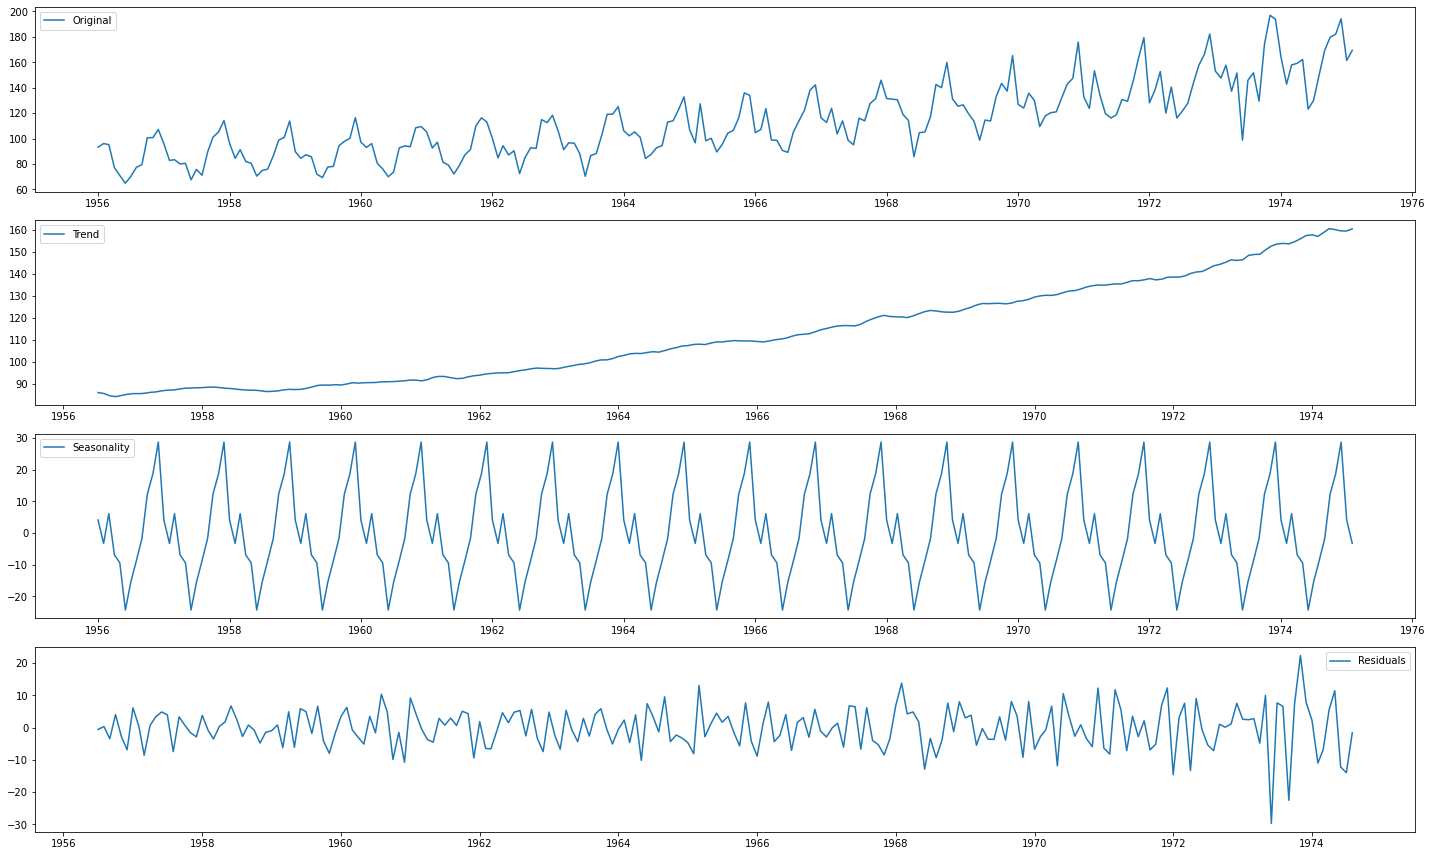

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,12))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

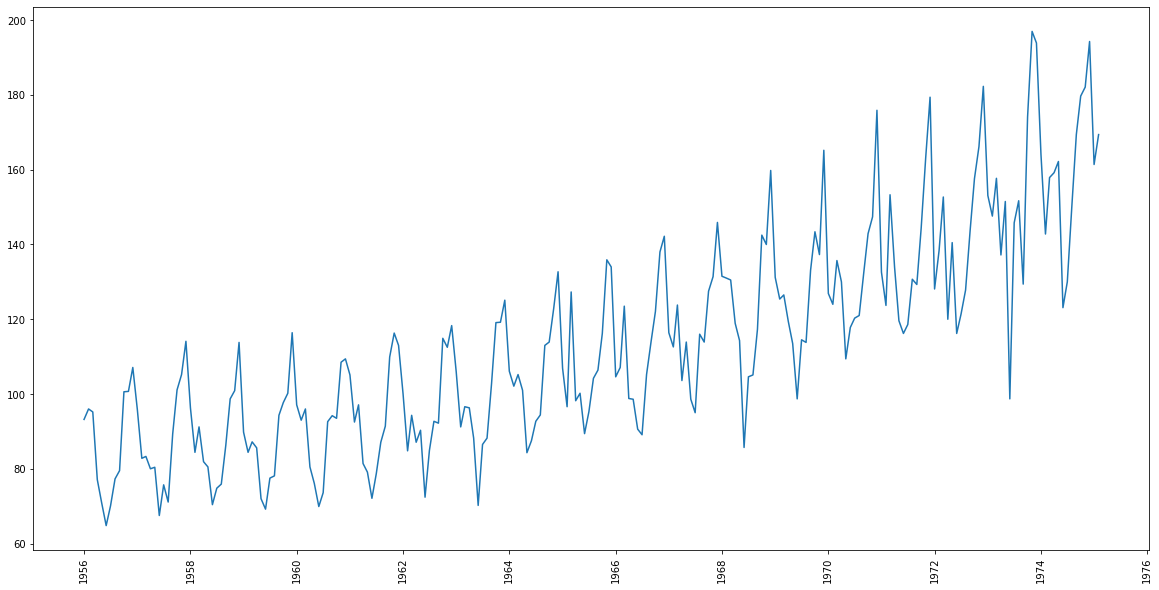

In [198]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.xticks(rotation = 90)
plt.show()

## Check for AutoCorrelation

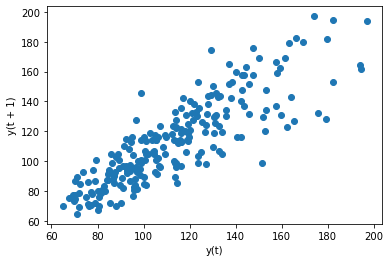

In [199]:
from pandas.plotting import lag_plot
lag_plot(data)
plt.show()

In [200]:
values = pd.DataFrame(data.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.854067
t+1  0.854067  1.000000


531.1534999999999


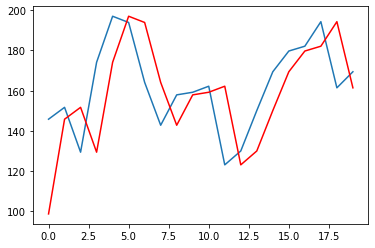

In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = dataframe.values
train, test = X[1:len(X)-20], X[len(X)-20:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model

def model_persistence(x):
    return(x)

# Validations

predictions = list()

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

test_score = mean_squared_error(test_y , predictions)

print(test_score)

# Actual Vs Predicted plot

plt.plot(test_y)
plt.plot(predictions , color = 'red')
plt.show()

## Implementing AR Model in python

In [202]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

Coefficients: [-4.78866606 -0.01177031 -0.02247809  0.06109809 -0.13175492 -0.11418901
 -0.0930273   0.1298874   0.06319287  0.06220774 -0.08081769  0.21861558
  0.78572947  0.05070155  0.08895319 -0.04296973  0.06089106  0.28177287
 -0.05026689 -0.09562193 -0.07640884]
predicted=128.323403, expected=145.800000
predicted=139.614869, expected=151.700000
predicted=144.410912, expected=129.400000
predicted=168.801334, expected=174.100000
predicted=176.476015, expected=197.000000
predicted=188.690512, expected=193.900000
predicted=157.236776, expected=164.100000
predicted=159.858080, expected=142.800000
predicted=158.487520, expected=157.900000
predicted=148.211094, expected=159.200000
predicted=151.906559, expected=162.200000
predicted=108.237364, expected=123.100000
predicted=137.605651, expected=130.000000
predicted=144.474025, expected=150.100000
predicted=152.292075, expected=169.400000
predicted=179.287456, expected=179.700000
predicted=178.545128, expected=182.100000
predicted=194.7

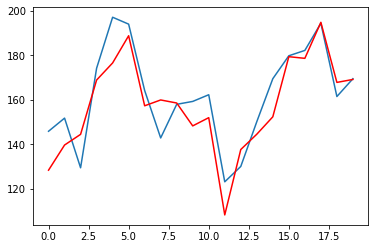

In [203]:
# split dataset
X = data.values
train, test = X[1:len(X)-20], X[len(X)-20:]


# train autoregression
model = AutoReg(train, lags=20)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)


# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
r2 = r2_score(test, predictions)
print('Test R2: %.3f' % r2)

# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Implementing MA Model in python

## ARIMA(p,d,q)

In [204]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
import warnings
warnings.filterwarnings('ignore')

# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data)-20, len(data))
print(yhat)

1973-07-01     82.584541
1973-08-01    161.553625
1973-09-01    105.811785
1973-10-01    131.323391
1973-11-01    145.961543
1973-12-01    152.264217
1974-01-01    145.091247
1974-02-01    127.829880
1974-03-01    124.748949
1974-04-01    138.618543
1974-05-01    129.029641
1974-06-01    138.633273
1974-07-01    101.478981
1974-08-01    135.086454
1974-09-01    124.782077
1974-10-01    147.366218
1974-11-01    137.995078
1974-12-01    146.974867
1975-01-01    149.431453
1975-02-01    122.459154
1975-03-01    149.138294
Freq: MS, Name: predicted_mean, dtype: float64


## Implementing ARMA Model in python

In [205]:
# fit model
model = ARIMA(data, order=(2, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

1975-03-01    162.098145
Freq: MS, dtype: float64


## Implementing ARIMA Model in python

In [206]:
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data), typ='levels')
print(yhat)

1975-03-01    164.926555
Freq: MS, dtype: float64


# Exponential Smoothing

## Simple Exponential Smoothing

The simple exponential smoothing model considers the historical values and assigns weights to these values. The idea is that weights are higher for recent observations.

the mathematical equations for this:

                        Ŷt+1 = αYt + α(1-α)Yt-1 + α(1-α)2Yt-2 + α(1-α)3Yt-3 +….  
Where,

    Yt represents the historical values
    Ŷt is the forecast
    alpha α is the smoothing parameter
    
The value of alpha (α) lies between 0-1. As you can see in the above equation, each subsequent Yt has a lower weight. Alpha is a hyperparameter and we can select the value of alpha. The table below will help you understand how changing the alpha value affects the forecasts:
    
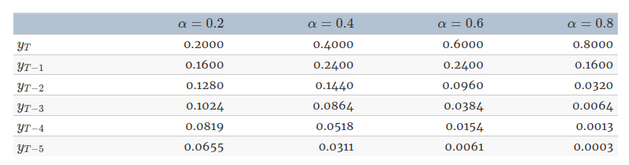

If the alpha value is low, more number of historical values are considered for the forecast. For higher values of alpha, such as 0.8 or 0.9, very few observations are taken into consideration.

## Double Exponential Smoothing

The double exponential smoothing algorithm uses the same idea as simple exponential smoothing. It uses historical values for making the predictions and assigning the weights in an exponentially increasing manner (higher weight to the recent observations). Additionally, the double exponential smoothing also considers the ‘trend’ of the series

                                    Forecast (DES) = Level + Trend
                                    
'Level’ here is the weighted average of the historical data

                                        Lt+1 = αLt  + (1-α) [L’t]  
                                        
This is similar to the simple exponential smoothing equation. The other component in the double exponential smoothing model is the ‘trend’. The ‘Trend’ is calculated as:

                                    Tt+1 =  β(Lt+1- Lt)  + (1-β) Tt
                                    
The beta here is a smoothing parameter for the trend component. The trend at a particular time is calculated to be the difference between the level terms (indicating an increase or decrease in the level). In order to consider the weighted sum of past trend values, we use (1-β) Tt where Tt is the trend calculated for the previous time step

Now the final forecast will be Ŷt =  Lt + Tt.

## Triple Exponential Smoothing

This is also popularly known as Holt Winter’s algorithm. The triple exponential smoothing algorithm, as the name suggest it has three components –  Level, Trend, and Seasonality.

the seasonal component can be in the additive or multiplicative form. This means that the final forecast can be in either of the two forms:

                                        Ŷt+1 = (Level + Trend) + Seasonality

                                        Ŷt+1 = (Level + Trend) x Seasonality

### Triple Exponential Smoothing: Additive Seasonality

For forecasting the values, we will need to find the values of Level, Trend, and Seasonality. The equation of Level, in this case, has a seasonality adjusted observation (Yt – St-m), since we are adding the seasonal component for forecasting. Along with that, the calculation of Level includes the level and trend of previous observations

                                        Lt =  α(Yt – St-m) + (1-α) [Lt-1 + Tt-1]
                                        
The equation of trend is the same as the double exponential smoothing model, given by

                                        Tt+1 =  β(Lt+1- Lt)  + (1-β) Tt
                                        
For seasonality, we take into consideration the previous nth value (and not the immediate value). Here is the equation for the additive seasonal component:

                                        St = γ(Yt – Lt) + (1-γ)St-m    
                                        
Gamma is the smoothing parameter for the seasonal component. Here, we consider the St-m, which is the seasonality at the previous mth time step. So, for a yearly seasonality, m = 12.

### Triple Exponential Smoothing: Multiplicative Seasonality

For Triple Exponential Smoothing(Multiplicative Seasonality) ,We can calculate the level in the following manner:

                                        Lt =  α(Yt/ St-m) + (1-α)[Lt-1 + Tt-1 ]
                                        
Notice that the seasonal component is not subtracted, but divided here. The equation of trend is similar to the double exponential smoothing model. Here’s the equation:

                                        Tt+1 =  β(Lt+1- Lt)  + (1-β) Tt
                                        
the seasonal value at the particular time step t and the seasonal value at the t-m step. Can be calculated as:

                                        St = γ(Yt / Lt) + (1-γ)St-m                                                             

# Implementation

In [207]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(train ,seasonal_periods=36 ,trend='mul', seasonal='mul',).fit()
yhat = fit1.forecast(len(test))

In [208]:
print(yhat)
test_score = r2_score(data[len(data)-20:] , yhat)
print("R2 score is: ",test_score)

[128.1752694  137.41060632 148.84849332 163.85855978 170.97091655
 189.74299424 155.55668995 147.77720321 166.24644404 145.13856192
 136.86403262 120.08826896 132.61416575 141.71955428 148.60684041
 171.79237226 181.69011009 197.10589677 158.2754621  154.17271071]
R2 score is:  0.5972992580253966


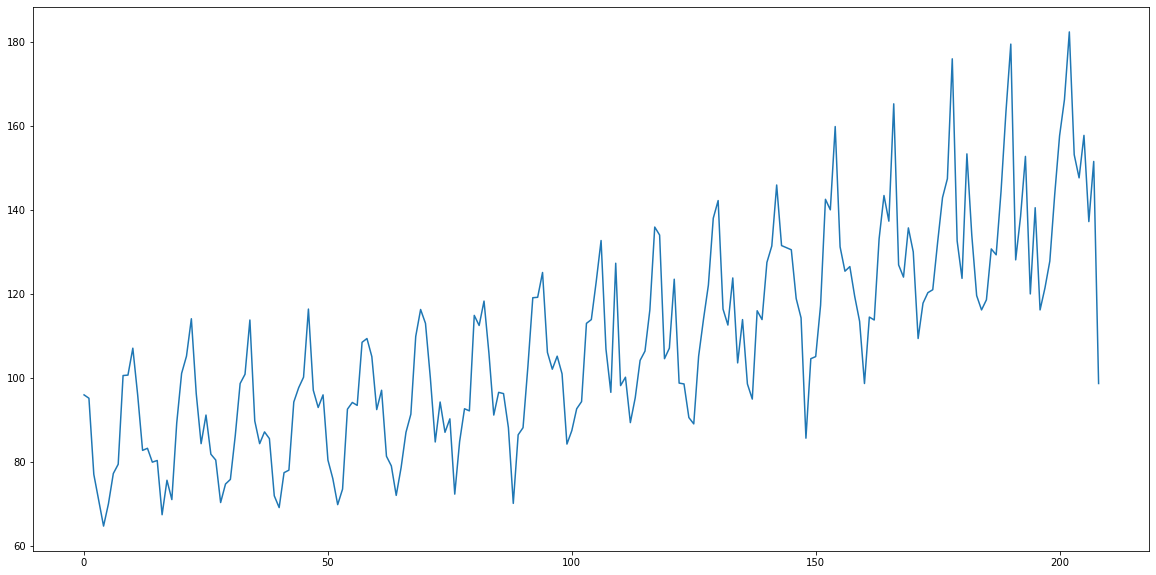

In [209]:
plt.figure(figsize=(20,10))
plt.plot(train, label='Train')

In [210]:
y = pd.DataFrame({"Arima":predictions,'se':yhat})
y

,Arima,se
0,128.323403,128.175269
1,139.614869,137.410606
2,144.410912,148.848493
3,168.801334,163.858560
4,176.476015,170.970917
5,188.690512,189.742994
6,157.236776,155.556690
7,159.858080,147.777203
8,158.487520,166.246444
9,148.211094,145.138562


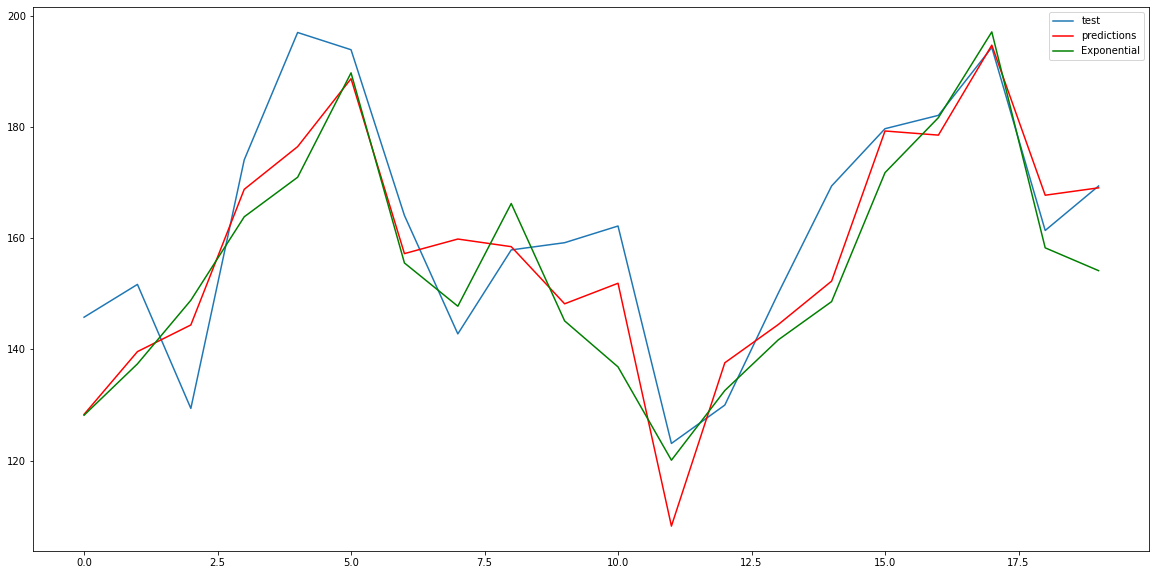

In [211]:
plt.figure(figsize=(20,10))
plt.plot(test,label='test')
plt.plot(predictions, color='red',label='predictions')
plt.plot(yhat, color='green',label='Exponential')
plt.legend(loc='best')
plt.show()